In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("sales_data_sample.csv",encoding='Latin-1')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
#get the statistical info of the data

df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
#check for null values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

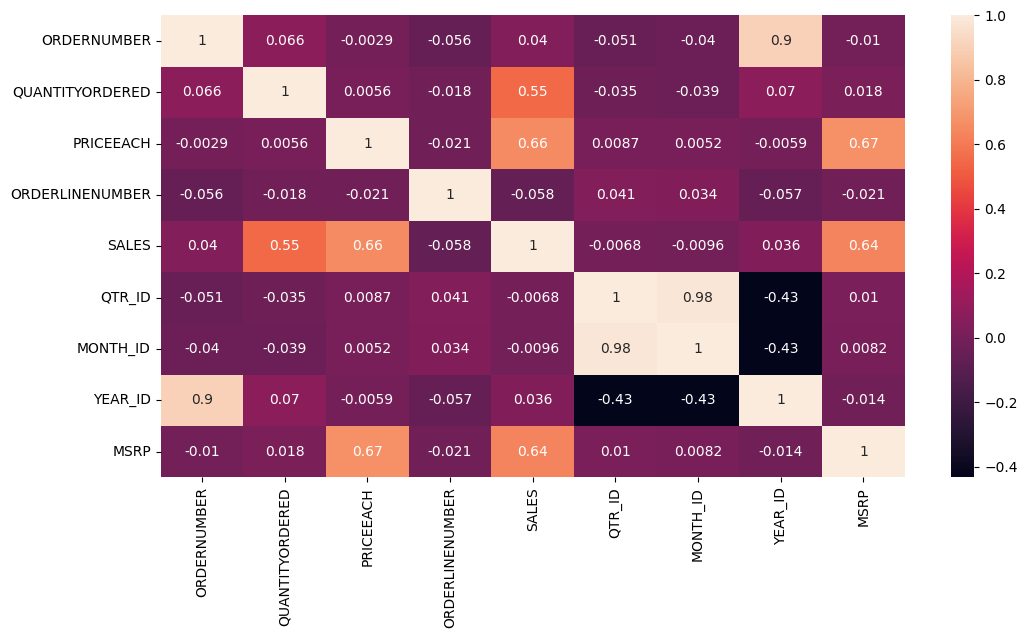

In [7]:
#correlation matrix

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

### K means Clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
X=df[["PRICEEACH","SALES"]]

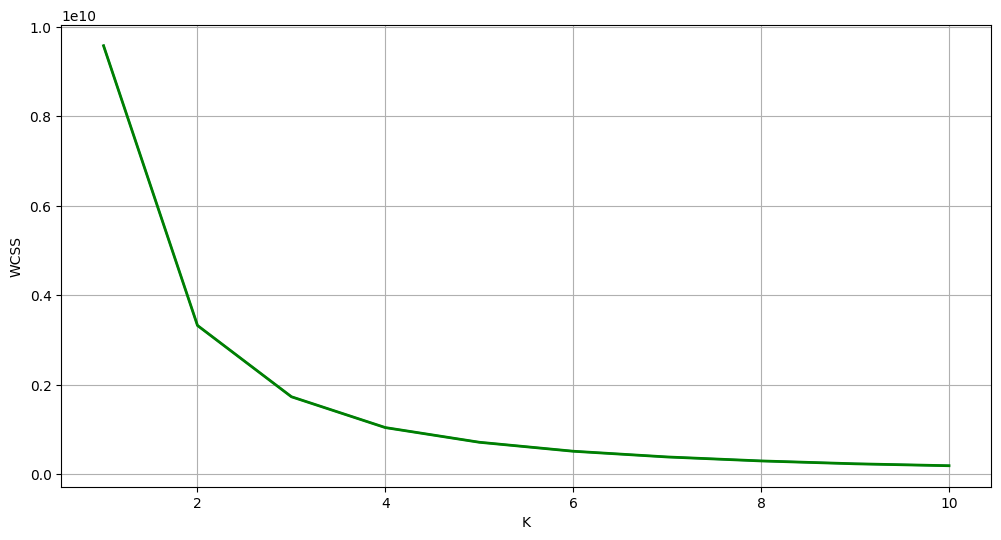

In [10]:
wcss=[]
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,color="green",linewidth=2)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [11]:
km_model=KMeans(n_clusters=4)
km_model.fit(X)
y_pred = km_model.predict(X)

In [12]:
X['Target']=y_pred
X.head()

,PRICEEACH,SALES,Target
0,95.70,2871.00,3
1,81.35,2765.90,3
2,94.74,3884.34,3
3,83.26,3746.70,3
4,100.00,5205.27,2


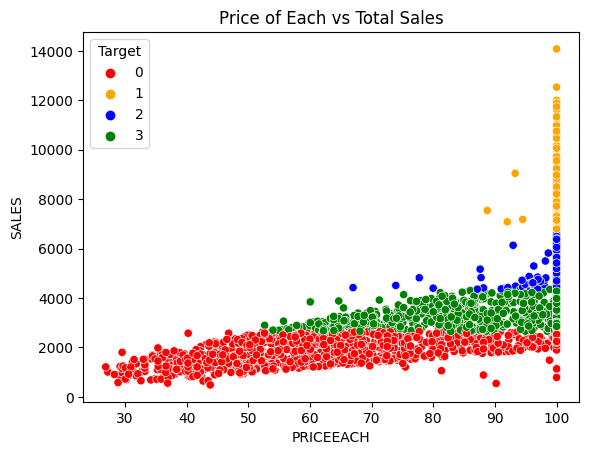

In [13]:
sns.scatterplot(X.PRICEEACH,X.SALES, hue=X.Target,palette=['red','orange','blue','green'])
plt.title("Price of Each vs Total Sales")
plt.show()

### Hierarchical clustering

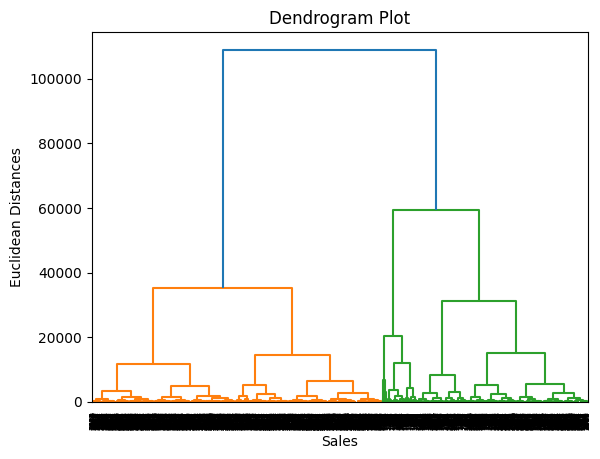

In [14]:
#Find the optimal k value using dendrogram graph

import scipy.cluster.hierarchy as shc 
dendro = shc.dendrogram(shc.linkage(X, method="ward"))  
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Sales")  
plt.show()  

In [15]:
#train tge model

from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(X.drop("Target",axis='columns'))  

In [16]:
X = X.drop("Target",axis='columns')

In [17]:
X = X.values

In [18]:
X

array([[  95.7 , 2871.  ],
       [  81.35, 2765.9 ],
       [  94.74, 3884.34],
       ...,
       [ 100.  , 5417.57],
       [  62.24, 2116.16],
       [  65.52, 3079.44]])

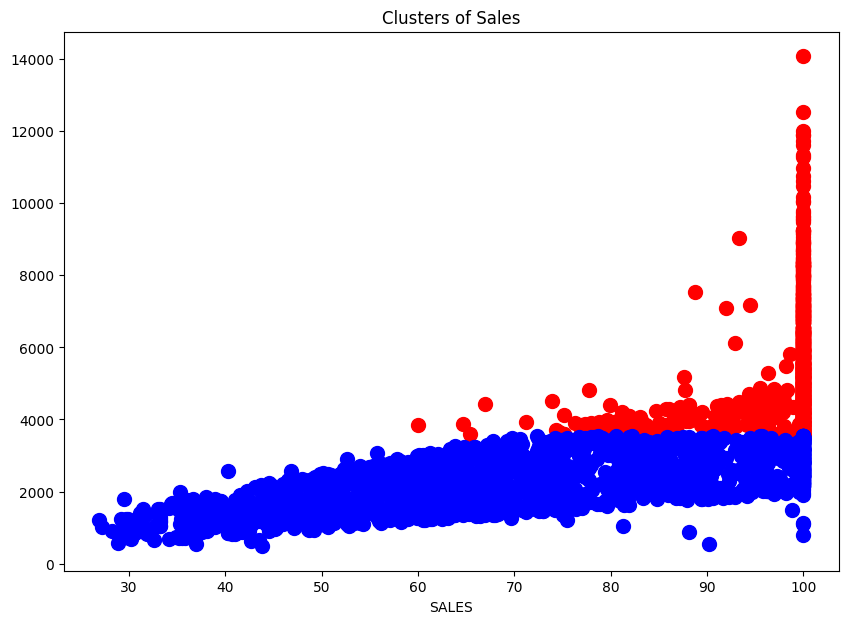

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c="red",label="Cluster 1")
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c="blue",label="Cluster 2")
plt.title("Clusters of Sales")
plt.xlabel("PRICEEACH")
plt.xlabel("SALES")
plt.show()